In [1]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df1=pd.read_csv(r"C:\Users\saran\Downloads\subject-info.csv")

In [9]:
df2=pd.read_csv(r"C:\Users\saran\Downloads\test_measure.csv")

In [19]:
#49.Identify the test name that had the shortest time duration.
duration_test = df2.groupby("ID_test")["time"].max()
short_test = duration_test.idxmin()
short_duration = duration_test.min()
print(f"Test with the short duration: {short_test}, Duration: {short_duration} seconds")

Test with the short duration: 564_1, Duration: 495 seconds


In [21]:
#50.What is the percentage difference in mean Carbon dioxide production between male and female athletes?
merged_data = df2.merge(df1, on="ID")
male_vco2_mean = merged_data[merged_data["Sex"] == 0]["VCO2"].mean(skipna = True)
female_vco2_mean = merged_data[merged_data["Sex"] == 1]["VCO2"].mean(skipna = True)
percentage_diff = ((male_vco2_mean - female_vco2_mean) / female_vco2_mean) * 100
print(f"Percentage difference in mean Carbon Dioxide production: {percentage_diff:.2f}%")


Percentage difference in mean Carbon Dioxide production: 41.43%


In [23]:
df = df2.merge(df1, on="ID", how="inner")


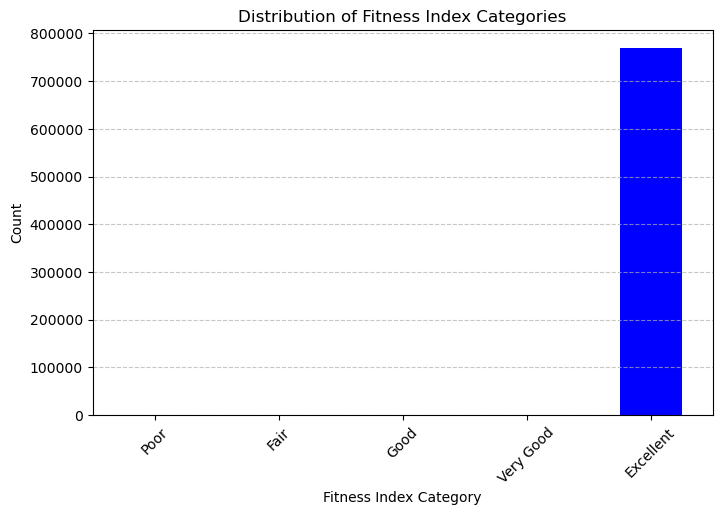

In [25]:
#51.Calculate the Fitness Index, generate a bar chart of Fitness Index categories, and export it as SVG file.
def calculate_fitness_index(row):
    return (row["VO2"] / row["Age"]) * 100
df["Fitness_Index"] = df.apply(calculate_fitness_index, axis=1)
bins = [0, 50, 70, 85, 100, float('inf')]
labels = ["Poor", "Fair", "Good", "Very Good", "Excellent"]
df["Fitness_Category"] = pd.cut(df["Fitness_Index"], bins=bins, labels=labels)
category_counts = df["Fitness_Category"].value_counts().sort_index()
plt.figure(figsize=(8, 5))
category_counts.plot(kind="bar", color=["red", "orange", "yellow", "green", "blue"])
plt.xlabel("Fitness Index Category")
plt.ylabel("Count")
plt.title("Distribution of Fitness Index Categories")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("fitness_index_chart.svg", format="svg")
plt.show()
    